<h2> Import Libraries</h2>

In [118]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import os
import random
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import array_to_img
from skimage.transform import resize
from PIL import Image
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
import os
import cv2
import numpy as np
import csv
from keras.models import model_from_json


In [3]:
data = pd.read_csv('C:/UTA/Machine Learning/Project/Dataset/archive/fer2013.csv')
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
print(data["emotion"].value_counts(sort=False))
w,h = 48, 48

0    4953
1     547
2    5121
3    8989
4    6077
5    4002
6    6198
Name: emotion, dtype: int64


In [4]:
#reshaping images 48x48
pixels = data['pixels'].tolist()

X = []
for x in pixels:
    x = [int(pixel) for pixel in x.split(' ')]
    x = np.asarray(x).reshape(w, h)
    X.append(x.astype('float32'))
#Normalization
X = np.asarray(X)
X = np.expand_dims(X, -1)

emotions = pd.get_dummies(data['emotion'])
print("Number of Features: "+str(len(X[0])))
#print("Number of Labels: "+ str(len(y[0])))
print("Number of examples in dataset:"+str(len(X)))
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)
print(X)


Number of Features: 48
Number of examples in dataset:35887
[[[[-0.60648495]
   [-0.4562006 ]
   [-0.40110716]
   ...
   [-0.76583207]
   [-0.901028  ]
   [-0.9487176 ]]

  [[-0.6577653 ]
   [-0.67946464]
   [-0.6925164 ]
   ...
   [-0.7071234 ]
   [-0.7820999 ]
   [-0.90432435]]

  [[-0.8304327 ]
   [-0.8934978 ]
   [-0.734429  ]
   ...
   [-0.7875835 ]
   [-0.72186905]
   [-0.85738075]]

  ...

  [[-0.33435795]
   [-0.6523918 ]
   [-0.937419  ]
   ...
   [-0.526588  ]
   [-0.7380636 ]
   [-0.9091638 ]]

  [[-0.51195467]
   [-0.43779588]
   [-0.46622527]
   ...
   [-0.10086355]
   [-0.5583586 ]
   [-0.870607  ]]

  [[-0.51134855]
   [-0.5642179 ]
   [-0.3995129 ]
   ...
   [-0.08714531]
   [-0.05788792]
   [-0.41197315]]]


 [[[ 0.37588486]
   [ 0.40796128]
   [ 0.41422534]
   ...
   [ 0.20136307]
   [ 0.29842654]
   [ 0.01435708]]

  [[ 0.39234453]
   [ 0.41382545]
   [ 0.457275  ]
   ...
   [ 0.12816645]
   [ 0.32547316]
   [ 0.23515376]]

  [[ 0.41038084]
   [ 0.45646253]
   [ 0.564

In [5]:
def draw_rect(img, x1, y1, x2, y2, c):
    h, w, _ = img.shape
    min_x1 = max(0, x1 - 1)
    max_x1 = min(w, x1 + 1)
    min_x2 = max(0, x2 - 1)
    max_x2 = min(w, x2 + 1)
    min_y1 = max(0, y1 - 1)
    max_y1 = min(h, y1 + 1)
    min_y2 = max(0, y2 - 1)
    max_y2 = min(h, y2 + 1)
    img[y1:y2, min_x1:max_x1, :] = c
    img[y1:y2, min_x2:max_x2, :] = c
    img[min_y1:max_y1, x1:x2, :] = c
    img[min_y2:max_y2, x1:x2, :] = c


File: 000000483897.jpg
File: 000000267014.jpg
File: 000000049062.jpg
File: 000000171479.jpg
File: 000000007839.jpg
File: 000000365493.jpg
File: 000000019501.jpg
File: 000000151864.jpg
File: 000000065182.jpg
File: 000000396004.jpg
File: 000000525732.jpg
File: 000000300509.jpg
File: 000000294667.jpg
File: 000000216114.jpg
File: 000000352758.jpg


C:\Users\chaph\anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


File: 000000030340.jpg
File: 000000413182.jpg
File: 000000404828.jpg
File: 000000024081.jpg
File: 000000023098.jpg
File: 000000012370.jpg
File: 000000084829.jpg
File: 000000502414.jpg
File: 000000449400.jpg
File: 000000397455.jpg
File: 000000046189.jpg
File: 000000239365.jpg
File: 000000326320.jpg
File: 000000356671.jpg
File: 000000391325.jpg
File: 000000187432.jpg
File: 000000127268.jpg
File: 000000081589.jpg
File: 000000105936.jpg
File: 000000342874.jpg
File: 000000351141.jpg
File: 000000219492.jpg
File: 000000455463.jpg
File: 000000099511.jpg
File: 000000135266.jpg
File: 000000238757.jpg
File: 000000000510.jpg
File: 000000560421.jpg
File: 000000556843.jpg
File: 000000427603.jpg
File: 000000491664.jpg
File: 000000077721.jpg
File: 000000184805.jpg
File: 000000556056.jpg
File: 000000308175.jpg
File: 000000122199.jpg
File: 000000324342.jpg
File: 000000501875.jpg
File: 000000093120.jpg
File: 000000508861.jpg
File: 000000163602.jpg
File: 000000191225.jpg
File: 000000048548.jpg
File: 00000

File: 000000244931.jpg
File: 000000166599.jpg
File: 000000560463.jpg
File: 000000434897.jpg
File: 000000133927.jpg
File: 000000103978.jpg
File: 000000424368.jpg
File: 000000239591.jpg
File: 000000537770.jpg
File: 000000295020.jpg
File: 000000215655.jpg
File: 000000330609.jpg
File: 000000067207.jpg
File: 000000328699.jpg
File: 000000251019.jpg
File: 000000350514.jpg
File: 000000333182.jpg
File: 000000043163.jpg
File: 000000330186.jpg
File: 000000064335.jpg
File: 000000043782.jpg
File: 000000557732.jpg
File: 000000220871.jpg
File: 000000479396.jpg
File: 000000435303.jpg
File: 000000004535.jpg
File: 000000529667.jpg
File: 000000139530.jpg
File: 000000487011.jpg
File: 000000054351.jpg
File: 000000561491.jpg
File: 000000228477.jpg
File: 000000257860.jpg
File: 000000223084.jpg
File: 000000000086.jpg
File: 000000423391.jpg
File: 000000255322.jpg
File: 000000048531.jpg
File: 000000363036.jpg
File: 000000214385.jpg
File: 000000347455.jpg
File: 000000526933.jpg
File: 000000248031.jpg
File: 00000

File: 000000535676.jpg
File: 000000270984.jpg
File: 000000061730.jpg
File: 000000364959.jpg
File: 000000404812.jpg
File: 000000342293.jpg
File: 000000051735.jpg
File: 000000529470.jpg
File: 000000154369.jpg
File: 000000156889.jpg
File: 000000277389.jpg
File: 000000470291.jpg
File: 000000288180.jpg
File: 000000521649.jpg
File: 000000297798.jpg
File: 000000126686.jpg
File: 000000135754.jpg
File: 000000202963.jpg
File: 000000106567.jpg
File: 000000442685.jpg
File: 000000305105.jpg
File: 000000288654.jpg
File: 000000021764.jpg
File: 000000176282.jpg
File: 000000079380.jpg
File: 000000250192.jpg
File: 000000051493.jpg
File: 000000103267.jpg
File: 000000040732.jpg
File: 000000554285.jpg
File: 000000572012.jpg
File: 000000230117.jpg
File: 000000302117.jpg
File: 000000358706.jpg
File: 000000147746.jpg
File: 000000015469.jpg
File: 000000448803.jpg
File: 000000179727.jpg
File: 000000179240.jpg
File: 000000170540.jpg
File: 000000389137.jpg
File: 000000152501.jpg
File: 000000511751.jpg
File: 00000

File: 000000534353.jpg
File: 000000499552.jpg
File: 000000010094.jpg
File: 000000267457.jpg
File: 000000576886.jpg
File: 000000564448.jpg
File: 000000306160.jpg
File: 000000108557.jpg
File: 000000175383.jpg
File: 000000157920.jpg
File: 000000424137.jpg
File: 000000437156.jpg
File: 000000074651.jpg
File: 000000310315.jpg
File: 000000036028.jpg
File: 000000385728.jpg
File: 000000204431.jpg
File: 000000412586.jpg
File: 000000299786.jpg
File: 000000101503.jpg
File: 000000387812.jpg
File: 000000406723.jpg
File: 000000028010.jpg
File: 000000137297.jpg
File: 000000539967.jpg
File: 000000322326.jpg
File: 000000055447.jpg
File: 000000253580.jpg
File: 000000312010.jpg
File: 000000376750.jpg
File: 000000343224.jpg
File: 000000085110.jpg
File: 000000136312.jpg
File: 000000551849.jpg
File: 000000565043.jpg
File: 000000281512.jpg
File: 000000272955.jpg
File: 000000433197.jpg
File: 000000227851.jpg
File: 000000444493.jpg
File: 000000139595.jpg
File: 000000386821.jpg
File: 000000264537.jpg
File: 00000

File: 000000498658.jpg
File: 000000123166.jpg
File: 000000222397.jpg
File: 000000461063.jpg
File: 000000095944.jpg
File: 000000447479.jpg
File: 000000158288.jpg
File: 000000295778.jpg
File: 000000564447.jpg
File: 000000471409.jpg
File: 000000160597.jpg
File: 000000575754.jpg
File: 000000239845.jpg
File: 000000542643.jpg
File: 000000396137.jpg
File: 000000330572.jpg
File: 000000165986.jpg
File: 000000377901.jpg
File: 000000211172.jpg
File: 000000216059.jpg
File: 000000446269.jpg
File: 000000338197.jpg
File: 000000357989.jpg
File: 000000245820.jpg
File: 000000412304.jpg
File: 000000061769.jpg
File: 000000475415.jpg
File: 000000055731.jpg
File: 000000392990.jpg
File: 000000492678.jpg
File: 000000107564.jpg
File: 000000482748.jpg
File: 000000009451.jpg
File: 000000406303.jpg
File: 000000088572.jpg
File: 000000266910.jpg
File: 000000328214.jpg
File: 000000559511.jpg
File: 000000066460.jpg
File: 000000196313.jpg
File: 000000491001.jpg
File: 000000507871.jpg
File: 000000307768.jpg
File: 00000

File: 000000085372.jpg
File: 000000493932.jpg
File: 000000286234.jpg
File: 000000168151.jpg
File: 000000392640.jpg
File: 000000179586.jpg
File: 000000393097.jpg
File: 000000254577.jpg
File: 000000556003.jpg
File: 000000163970.jpg
File: 000000535422.jpg
File: 000000112362.jpg
File: 000000382729.jpg
File: 000000123382.jpg
File: 000000480977.jpg
File: 000000179758.jpg
File: 000000127189.jpg
File: 000000218931.jpg
File: 000000329687.jpg
File: 000000167927.jpg
File: 000000260991.jpg
File: 000000437522.jpg
File: 000000181677.jpg
File: 000000147148.jpg
File: 000000150754.jpg
File: 000000167683.jpg
File: 000000309878.jpg
File: 000000049720.jpg
File: 000000168111.jpg
File: 000000407443.jpg
File: 000000120006.jpg
File: 000000187829.jpg
File: 000000364031.jpg
File: 000000295745.jpg
File: 000000442150.jpg
File: 000000537198.jpg
File: 000000505035.jpg
File: 000000490585.jpg
File: 000000053793.jpg
File: 000000570477.jpg
File: 000000286171.jpg
File: 000000271282.jpg
File: 000000018563.jpg
File: 00000

File: 000000033240.jpg
File: 000000377427.jpg
File: 000000103231.jpg
File: 000000343812.jpg
File: 000000574138.jpg
File: 000000522338.jpg
File: 000000200381.jpg
File: 000000493698.jpg
File: 000000034835.jpg
File: 000000199331.jpg
File: 000000078858.jpg
File: 000000133912.jpg
File: 000000077707.jpg
File: 000000112849.jpg
File: 000000573453.jpg
File: 000000490284.jpg
File: 000000020853.jpg
File: 000000024518.jpg
File: 000000555170.jpg
File: 000000455565.jpg
File: 000000196197.jpg
File: 000000061503.jpg
File: 000000454541.jpg
File: 000000561311.jpg
File: 000000515899.jpg
File: 000000149388.jpg
File: 000000329654.jpg
File: 000000006602.jpg
File: 000000273001.jpg
File: 000000065292.jpg
File: 000000555921.jpg
File: 000000406152.jpg
File: 000000325915.jpg
File: 000000113561.jpg
File: 000000007207.jpg
File: 000000092190.jpg
File: 000000563045.jpg
File: 000000232801.jpg
File: 000000495124.jpg
File: 000000241963.jpg
File: 000000360792.jpg
File: 000000536855.jpg
File: 000000035248.jpg
File: 00000

File: 000000262727.jpg
File: 000000073707.jpg
File: 000000034475.jpg
File: 000000076893.jpg
File: 000000024808.jpg
File: 000000247884.jpg
File: 000000258772.jpg
File: 000000552851.jpg
File: 000000184924.jpg
File: 000000255627.jpg
File: 000000393978.jpg
File: 000000419294.jpg
File: 000000121040.jpg
File: 000000204162.jpg
File: 000000510827.jpg
File: 000000501677.jpg
File: 000000303264.jpg
File: 000000034900.jpg
File: 000000575310.jpg
File: 000000188143.jpg
File: 000000371513.jpg
File: 000000559908.jpg
File: 000000519329.jpg
File: 000000367429.jpg
File: 000000504968.jpg
File: 000000461430.jpg
File: 000000563015.jpg
File: 000000233437.jpg
File: 000000299757.jpg
File: 000000278656.jpg
File: 000000308496.jpg
File: 000000221060.jpg
File: 000000450993.jpg
File: 000000227743.jpg
File: 000000103030.jpg
File: 000000188426.jpg
File: 000000308608.jpg
File: 000000288544.jpg
File: 000000140351.jpg
File: 000000324952.jpg
File: 000000389595.jpg
File: 000000406053.jpg
File: 000000542510.jpg
File: 00000

File: 000000190087.jpg
File: 000000550147.jpg
File: 000000114880.jpg
File: 000000013815.jpg
File: 000000280083.jpg
File: 000000377213.jpg
File: 000000287406.jpg
File: 000000326414.jpg
File: 000000506641.jpg
File: 000000373283.jpg
File: 000000444294.jpg
File: 000000316528.jpg
File: 000000372265.jpg
File: 000000232919.jpg
File: 000000081200.jpg
File: 000000447980.jpg
File: 000000156939.jpg
File: 000000075027.jpg
File: 000000274745.jpg
File: 000000259809.jpg
File: 000000128826.jpg
File: 000000575194.jpg
File: 000000107205.jpg
File: 000000029687.jpg
File: 000000202080.jpg
File: 000000188386.jpg
File: 000000199577.jpg
File: 000000150508.jpg
File: 000000086549.jpg
File: 000000526491.jpg
File: 000000039802.jpg
File: 000000292730.jpg
File: 000000296021.jpg
File: 000000097097.jpg
File: 000000179034.jpg
File: 000000370722.jpg
File: 000000277764.jpg
File: 000000453738.jpg
File: 000000134948.jpg
File: 000000464087.jpg
File: 000000522243.jpg
File: 000000202307.jpg
File: 000000313770.jpg
File: 00000

File: 000000522834.jpg
File: 000000491279.jpg
File: 000000417216.jpg
File: 000000408327.jpg
File: 000000022180.jpg
File: 000000126434.jpg
File: 000000208031.jpg
File: 000000171443.jpg
File: 000000256940.jpg
File: 000000083254.jpg
File: 000000419387.jpg
File: 000000568064.jpg
File: 000000265366.jpg
File: 000000258714.jpg
File: 000000109229.jpg
File: 000000124952.jpg
File: 000000502963.jpg
File: 000000025147.jpg
File: 000000124873.jpg
File: 000000428142.jpg
File: 000000232950.jpg
File: 000000491879.jpg
File: 000000237942.jpg
File: 000000394892.jpg
File: 000000124178.jpg
File: 000000407634.jpg
File: 000000203989.jpg
File: 000000030548.jpg
File: 000000457449.jpg
File: 000000447978.jpg
File: 000000035049.jpg
File: 000000127454.jpg
File: 000000039811.jpg
File: 000000233004.jpg
File: 000000045059.jpg
File: 000000380636.jpg
File: 000000520614.jpg
File: 000000420939.jpg
File: 000000133845.jpg
File: 000000002402.jpg
File: 000000208723.jpg
File: 000000523173.jpg
File: 000000346314.jpg
File: 00000

KeyboardInterrupt: 

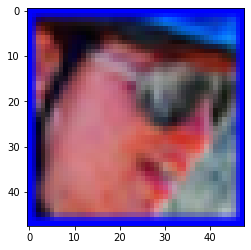

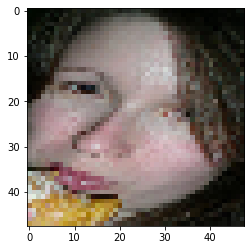

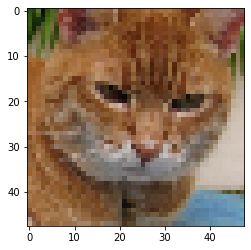

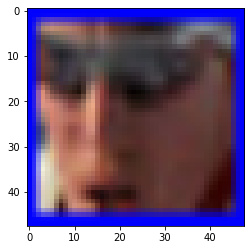

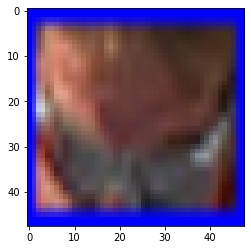

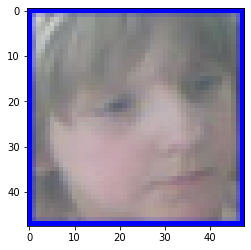

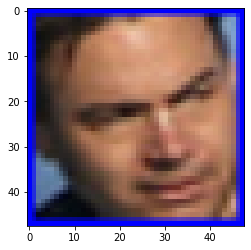

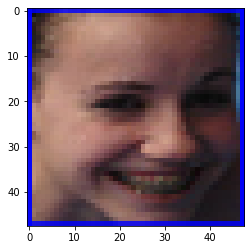

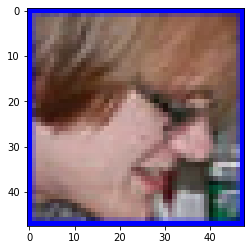

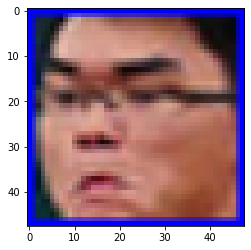

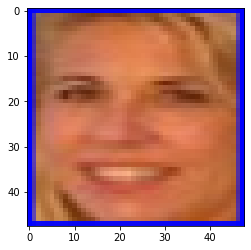

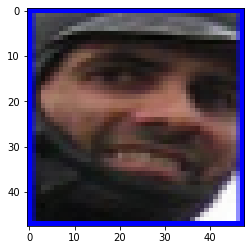

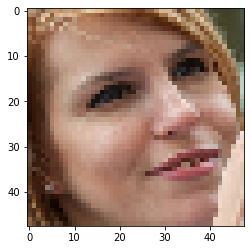

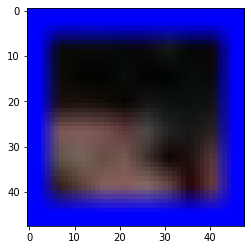

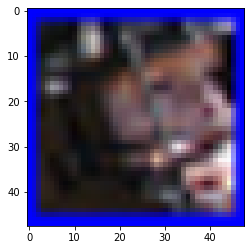

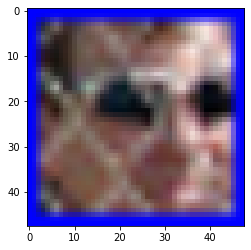

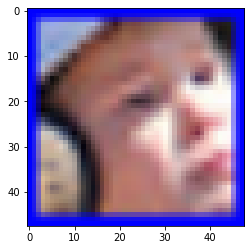

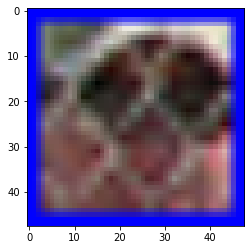

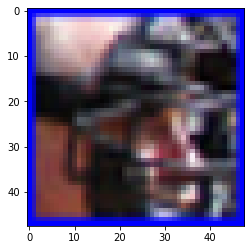

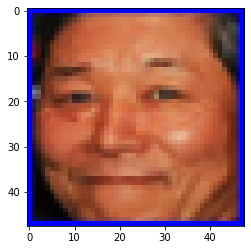

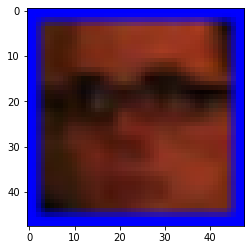

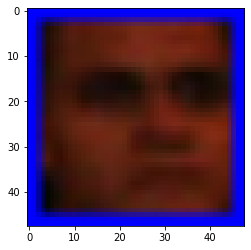

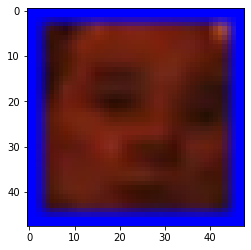

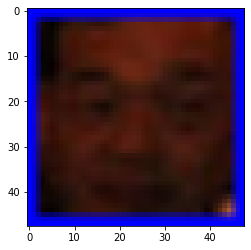

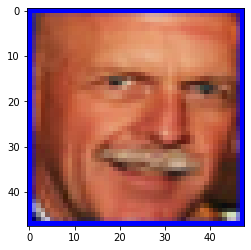

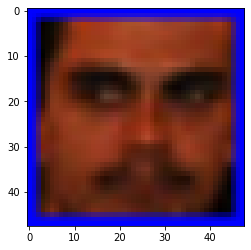

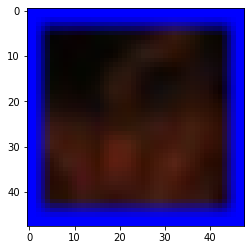

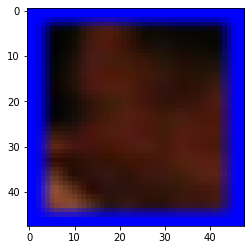

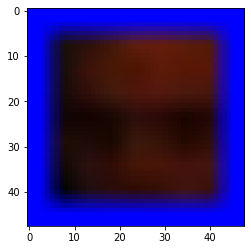

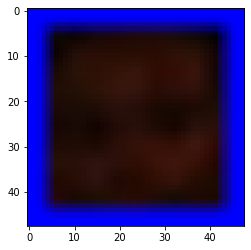

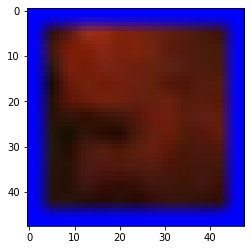

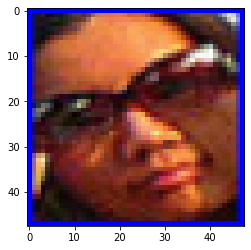

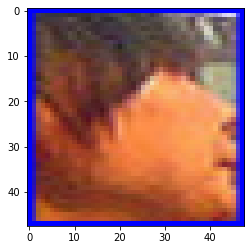

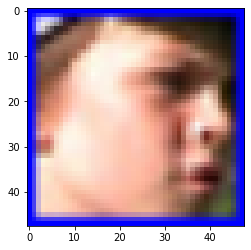

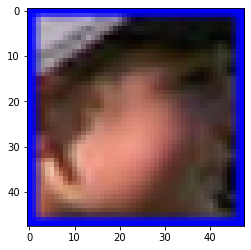

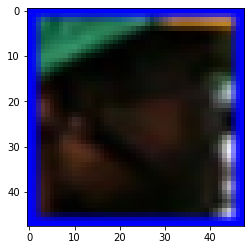

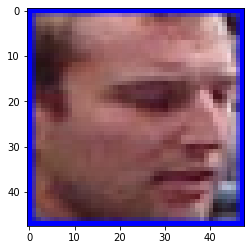

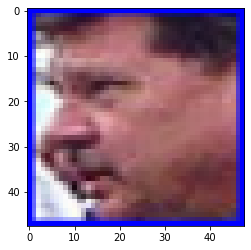

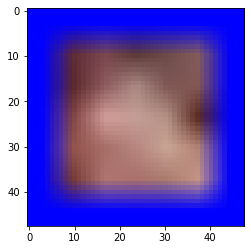

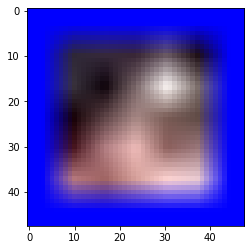

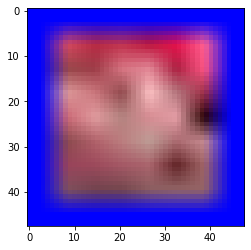

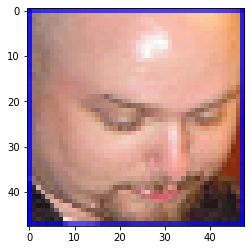

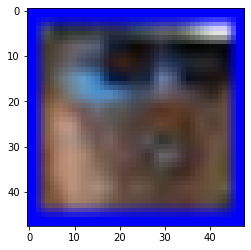

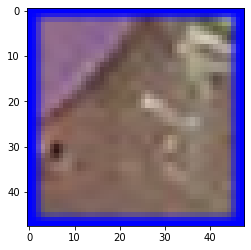

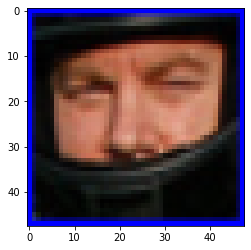

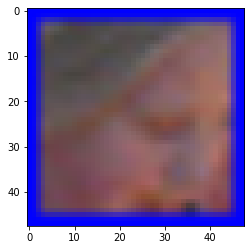

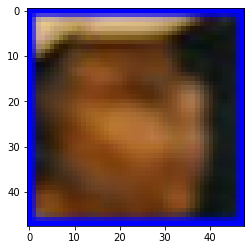

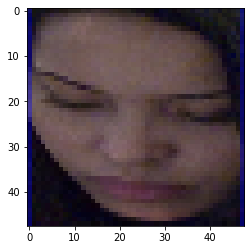

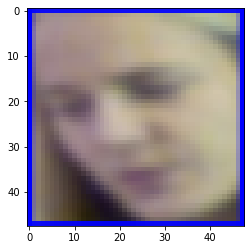

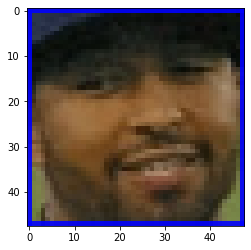

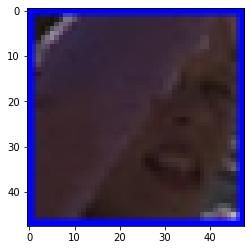

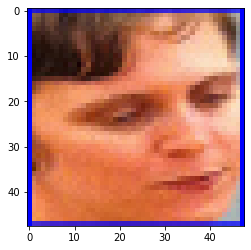

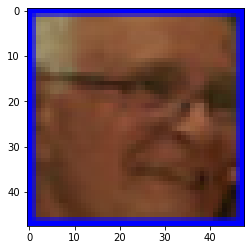

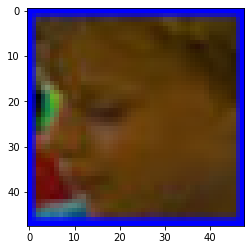

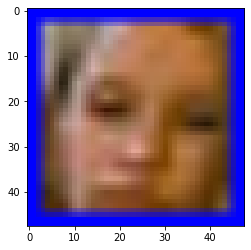

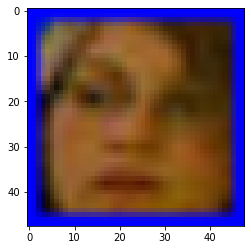

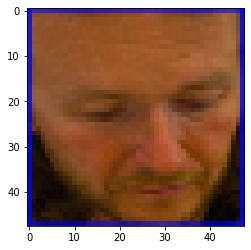

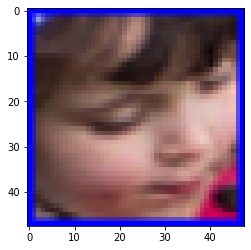

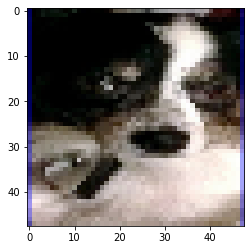

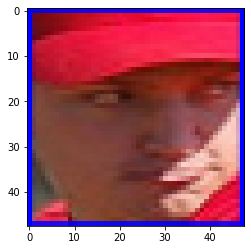

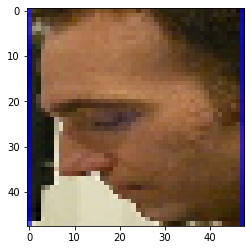

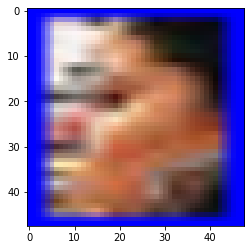

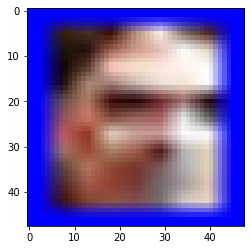

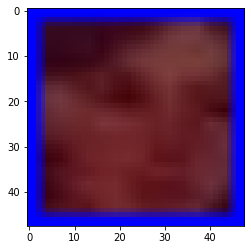

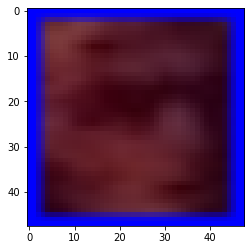

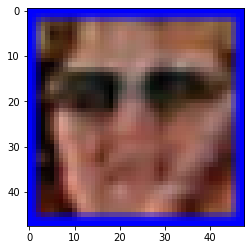

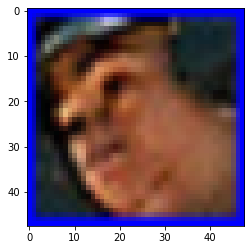

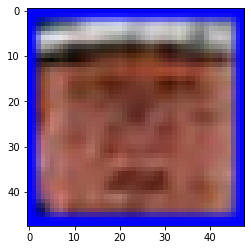

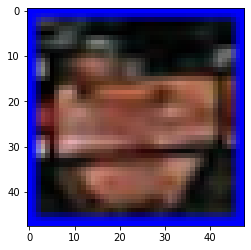

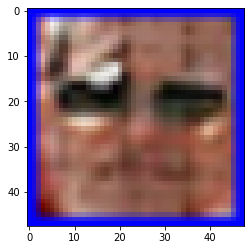

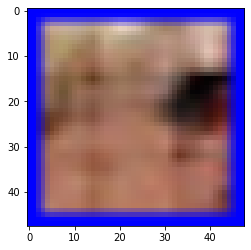

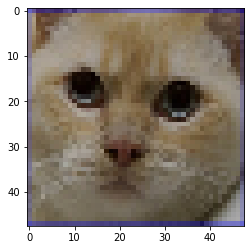

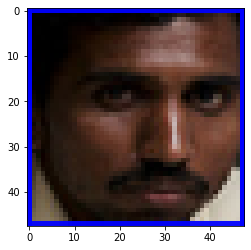

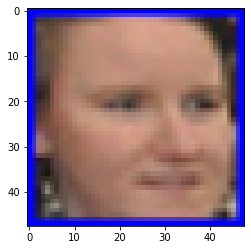

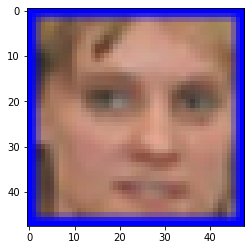

Error in callback <function flush_figures at 0x000002A1510DDB88> (for post_execute):


KeyboardInterrupt: 

In [92]:


model = model_from_json(open("C:/Users/chaph/emotion.json", "r").read())
#load weights
model.load_weights('C:/Users/chaph/emotion.h5')
coco_prefix = "C:/UTA/Machine Learning/Project/Dataset/train2017/train2017"


labels = "C:/UTA/Machine Learning/Project/Dataset/train2017/train2017.txt"

labels_by_file = {}
with open(labels, "r") as f:
    for line in f:
        filename, x1, y1, x2, y2 = line.replace("\n", "").split(" ")
        x1, y1, x2, y2 = float(x1), float(y1), float(x2), float(y2)
        if not filename in labels_by_file:
            labels_by_file[filename] = []
        labels_by_file[filename].append((x1, y1, x2, y2))
coco_file=open("C:/UTA/Machine Learning/Project/Dataset/COCOPREDN.csv","a")
for cf in labels_by_file:
    #random_file = random.choice(list(labels_by_file.keys()))
    print("File: {0}".format(cf))
    img = cv2.cv2.imread(os.path.join(coco_prefix, cf))
    img = img[:,:,::-1]

    h, w, _ = img.shape
    a=[]

    for label in labels_by_file[cf]:
        x1, y1, x2, y2 = label
        x1 = int(x1*w)
        x2 = int(x2*w)
        y1 = int(y1*h)
        y2 = int(y2*h)
        if x1 >= w:
            x1 = w - 1
        if x2 >= w:
            x2 = w - 1
        if y1 >= h:
            y1 = h - 1
        if y2 >= h:
            y2 = h - 1

        color = (0,0,255)
        draw_rect(img, x1, y1, x2, y2, color)
        a.append([x1, y1, x2, y2])

    li=[]
    for i in a:
        roi = img[i[1]:i[3],i[0]:i[2]]
        li.append(roi)


    c=len(li)
    for l in li:
        lr=cv2.resize(l, (48,48))
        #lg = cv2.cvtColor(lr, cv2.COLOR_BGR2GRAY)
        fig, ax = plt.subplots()
        ax.imshow(lr)
        cv2.imshow('Grayscale', lr) 
        directory = r'C:/UTA/Machine Learning/Project/Dataset/COCON'
        os.chdir(directory)
        #print(cf)
        of=cf.split(".")
        filename=of[0]+str(c)+".jpg"
        cv2.imwrite(filename,lr)
        roi_gray= cv2.cvtColor(lr, cv2.COLOR_BGR2GRAY)
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255
        cocopred= model.predict(img_pixels)
        csv_writer = csv.writer(coco_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        csv_writer.writerow([np.argmax(cocopred[0]),filename])
        #coco_file.write([np.argmax(cocopred[0]),filename])
        c-=1

<h2> Model Creation </h2>

<h3> Splitting Data and creating a model </h3>

In [133]:


df=pd.read_csv('C:/UTA/Machine Learning/Project/Dataset/archive/fer2013.csv')


X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


num_features = 64
num_labels = 7
batch_size = 264
epochs = 200
width, height = 48, 48


X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
model = Sequential()
# model.add(Conv2D(64, kernel_size=(3,3), padding= 'same',activation= 'relu', input_shape=(X_train.shape[1:])))
# model.add(Conv2D(64, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

# model.add(Conv2D(128, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(Conv2D(128, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

# model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(Conv2D(256, kernel_size=(3,3), padding= 'same', activation= 'relu'))
# model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

# model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
# model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
# model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

# model.add(Conv2D(512, kernel_size=(3,3), padding= 'same', activation= 'relu'))
# model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

# model.add(Flatten())
# model.add(Dense(4096, activation= 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4096, activation= 'relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation= 'softmax'))

# model.compile(optimizer= tf.keras.optimizers.Adam(0.003),
#             loss='categorical_crossentropy',
#             metrics=['accuracy'])







model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.25))



model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
#model.add(Dense(num_labels, activation='softmax'))


model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.15))
# model.add(Dense(512, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))

<h2> Compiling and training the model </h2>

In [134]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

out=model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


Epoch 1/200
109/109 [==============================] - 5s 46ms/step - loss: 1.6737 - accuracy: 0.3235 - val_loss: 1.9196 - val_accuracy: 0.1825
Epoch 2/200
109/109 [==============================] - 5s 45ms/step - loss: 1.4505 - accuracy: 0.4398 - val_loss: 1.8498 - val_accuracy: 0.2951
Epoch 3/200
109/109 [==============================] - 5s 45ms/step - loss: 1.3451 - accuracy: 0.4836 - val_loss: 1.6375 - val_accuracy: 0.3722
Epoch 4/200
109/109 [==============================] - 5s 45ms/step - loss: 1.2755 - accuracy: 0.5142 - val_loss: 1.3941 - val_accuracy: 0.4717
Epoch 5/200
109/109 [==============================] - 5s 45ms/step - loss: 1.2288 - accuracy: 0.5308 - val_loss: 1.2056 - val_accuracy: 0.5433
Epoch 6/200
109/109 [==============================] - 5s 46ms/step - loss: 1.1870 - accuracy: 0.5494 - val_loss: 1.1627 - val_accuracy: 0.5556
Epoch 7/200
109/109 [==============================] - 5s 46ms/step - loss: 1.1486 - accuracy: 0.5648 - val_loss: 1.1613 - val_accuracy:

109/109 [==============================] - 5s 50ms/step - loss: 0.6482 - accuracy: 0.7619 - val_loss: 1.1205 - val_accuracy: 0.6280
Epoch 58/200
109/109 [==============================] - 5s 50ms/step - loss: 0.6305 - accuracy: 0.7681 - val_loss: 1.1522 - val_accuracy: 0.6261
Epoch 59/200
109/109 [==============================] - 5s 50ms/step - loss: 0.6342 - accuracy: 0.7656 - val_loss: 1.1354 - val_accuracy: 0.6289
Epoch 60/200
109/109 [==============================] - 5s 50ms/step - loss: 0.6307 - accuracy: 0.7673 - val_loss: 1.1569 - val_accuracy: 0.6241
Epoch 61/200
109/109 [==============================] - 5s 50ms/step - loss: 0.6262 - accuracy: 0.7647 - val_loss: 1.1207 - val_accuracy: 0.6180
Epoch 62/200
109/109 [==============================] - 5s 50ms/step - loss: 0.6204 - accuracy: 0.7715 - val_loss: 1.1354 - val_accuracy: 0.6230
Epoch 63/200
109/109 [==============================] - 6s 50ms/step - loss: 0.6231 - accuracy: 0.7708 - val_loss: 1.1475 - val_accuracy: 0.629

KeyboardInterrupt: 

In [25]:
plt.imshow(array_to_img(X_test[120]))
plt.show()

NameError: name 'array_to_img' is not defined

In [ ]:
test_y[120]
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [ ]:
emotions

In [ ]:
op1 = model.predict(np.array(X_test[500]).reshape(-1,48,48,1))
emotions[np.argmax(op1[0])]

<h2> Plotting charts of the outputs </h2>

<h3> Loss per Epochs </h3>

In [ ]:
plt.plot(out.history["loss"],label='Training Loss ')
plt.plot(out.history["val_loss"],label='Testing Loss ')
#plt.plot(ld,rtrerr,label='Training ', color='blue')
#plt.plot(ld,rtterr,label='Testing',color='red')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.title('Train VS Test Loss')
plt.legend()

<h3> Model Accuracy </h3>

In [ ]:
plt.plot(out.history["accuracy"],label='Training Accuracy ')
plt.plot(out.history["val_accuracy"],label='Testing Accuracy ')
#plt.plot(ld,rtrerr,label='Training ', color='blue')
#plt.plot(ld,rtterr,label='Testing',color='red')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.title('Train VS Test Loss')
plt.legend()

In [ ]:
model.save('C:/Users/chaph/emotion.h5')

(3, 48, 48, 1)
[[5.0561721e-03 4.4835590e-05 7.2628008e-03 9.7628558e-01 3.1534000e-03
  5.6255795e-03 2.5715551e-03]
 [3.1087012e-04 1.0624753e-03 9.8215598e-01 2.9862006e-04 1.1727003e-02
  3.5497418e-03 8.9525938e-04]
 [2.0837405e-01 1.9764015e-05 7.4598646e-01 2.2648308e-02 7.0042188e-05
  2.2900801e-02 5.4089156e-07]]


'happy'

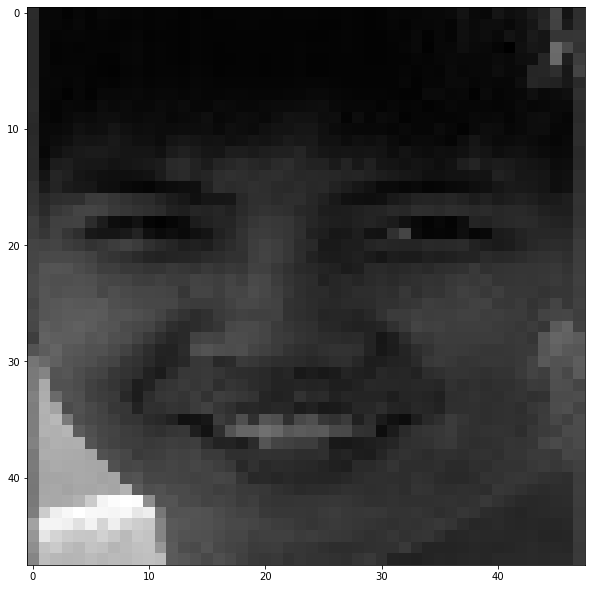

In [52]:


config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
img = []
img1 = img_to_array(load_img('C:/UTA/Machine Learning/Project/Dataset/COCO/0000002394451.jpg'))
#img1= cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


#print(X_train.shape)

#img1 = resize(img1, (48, 48))
img.append(img1)

img_pixels=np.array(img1).reshape(-1,48,48,1)
print(img_pixels.shape)
#img_pixels = image.img_to_array(img1)

# print(img_pixels.shape)
# img_pixels=img_pixels.reshape(-1,48, 48,1)
# #img_pixels = np.expand_dims(img_pixels, axis = 0)
# img_pixels.reshape(-1,48,48,1)
#img_pixels /= 255

# img = np.array(img, dtype=float)
# #img = rgb2lab(1.0/255*img)[:,:,:,0]
# img = img.reshape(img.shape+(1,))

#print(img_pixels)
op1 = model.predict(img_pixels)

print(op1)
imgr = array_to_img(img1)
# img = Image.fromarray(img1)
fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(imgr)


max_index = np.argmax(op1[0])

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
predicted_emotion = emotions[max_index]
predicted_emotion
# op1 = op1 * 128


# result = np.zeros((256, 256, 3))
# result[:,:,0] = img[0][:,:,0]
# result[:,:,1:] = op1[0]
# show = lab2rgb(result)
# imshow(show)

# path="C:/Users/perei/Downloads/t2.jpg"
# display(Image.open(path))


# lr=cv2.resize(lr, (48, 48))
# model.predict(lr[1:])

In [ ]:
fer_json = model.to_json()
with open("C:/Users/chaph/emotion.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("C:/Users/chaph/emotion.h5.h5")

In [115]:
cdata = pd.read_csv('C:/UTA/Machine Learning/Project/Dataset/COCOPRED.csv',header=None)
cdata.loc[[13]]

imgfile=cdata[cdata[1]=="0000000554171.jpg"]
# cdata[cdata[1]=="0000004554631.jpg"]


(3, 48, 48, 1)
[[4.4636190e-02 3.3016456e-04 1.9405742e-01 3.6260772e-02 7.2262907e-01
  1.8684773e-03 2.1787654e-04]
 [2.0867617e-01 1.9810230e-05 7.4572265e-01 2.2628417e-02 7.0111630e-05
  2.2882313e-02 5.4111763e-07]
 [1.6179445e-01 2.3258639e-05 7.9840535e-01 1.8698609e-02 6.9957852e-05
  2.1007763e-02 5.0409125e-07]]
Emotions: ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


,0,1
6792,4,0000000554171.jpg


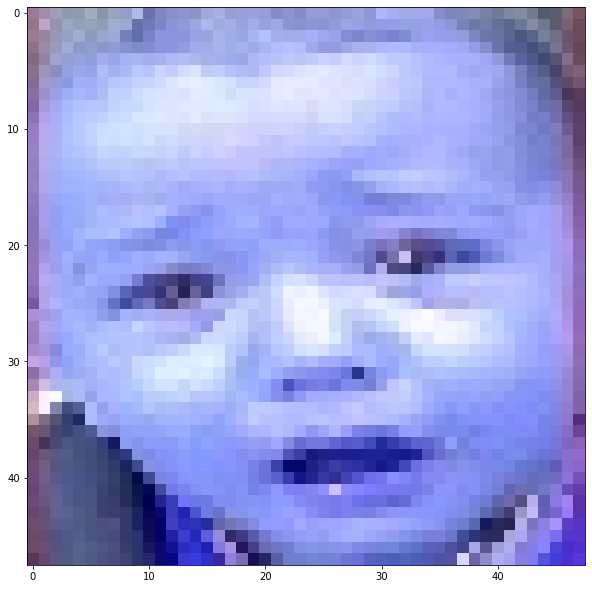

In [114]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import array_to_img
from skimage.transform import resize
from PIL import Image


config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
img = []

img1 = img_to_array(load_img('C:/UTA/Machine Learning/Project/Dataset/COCON/0000000554171.jpg'))
#img1 = img_to_array(load_img('C:/UTA/Machine Learning/Project/Dataset/COCO/0000004554631.jpg'))
#img1= cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


#print(X_train.shape)

#img1 = resize(img1, (48, 48))
img.append(img1)

img_pixels=np.array(img1).reshape(-1,48,48,1)
print(img_pixels.shape)
#img_pixels = image.img_to_array(img1)

# print(img_pixels.shape)
# img_pixels=img_pixels.reshape(-1,48, 48,1)
# #img_pixels = np.expand_dims(img_pixels, axis = 0)
# img_pixels.reshape(-1,48,48,1)
#img_pixels /= 255

# img = np.array(img, dtype=float)
# #img = rgb2lab(1.0/255*img)[:,:,:,0]
# img = img.reshape(img.shape+(1,))

#print(img_pixels)
op1 = model.predict(img_pixels)

print(op1)
imgr = array_to_img(img1)
# img = Image.fromarray(img1)
fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(imgr)


max_index = np.argmax(op1[0])
print("Emotions:",Emotions)
cdata = pd.read_csv('C:/UTA/Machine Learning/Project/Dataset/COCOPRED.csv',header=None)
cdata[cdata[1]=="0000000554171.jpg"]

# emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
# predicted_emotion = emotions[max_index]
# predicted_emotion
# op1 = op1 * 128


# result = np.zeros((256, 256, 3))
# result[:,:,0] = img[0][:,:,0]
# result[:,:,1:] = op1[0]
# show = lab2rgb(result)
# imshow(show)

# path="C:/Users/perei/Downloads/t2.jpg"
# display(Image.open(path))


# lr=cv2.resize(lr, (48, 48))
# model.predict(lr[1:])